# Assignment 8
### Adeline Casali
### August 24, 2023

### The libraries you will use are already loaded for you below

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain

## Question 1
Read in the two Netflix CSV files from /Data/Netflix as pandas dataframes. Print the number of unique genres. This is not as simple as it sounds. You cannot simply find the length of `titles['genres'].unique()`. You must convert the output of that code to a list, iterate over that list and replace the following characters: `[]',`. Once you have them replace you can split the individual strings to list items and flatten the list. I have already imported the `chain()` function for you to flatten the list. Look up the documentation to see its usage. There are 19 unique genres, but I want you to write the code to find them. 

In [24]:
# Read the CSV files
titles_df = pd.read_csv('Data/Netflix/titles.csv')
credits_df = pd.read_csv('Data/Netflix/credits.csv')

# Extract unique genres
unique_genres = titles_df['genres'].unique()

# Replace characters and split to list
genre_list = [genre.replace("[", "").replace("]", "").replace("'", "").replace(",", "").strip() for genre in unique_genres]

# Split individual strings and flatten the list
flattened_genres = list(chain.from_iterable(genre.split() for genre in genre_list))

# Get unique genres and print
unique_genres = set(flattened_genres)
print("Number of unique genres:", len(unique_genres))

Number of unique genres: 19


## Question 2
Print the release year and the imdb score of the highest average score of all movies by year. This is trickier than it sounds. To do this you will need to aggregate the means by year. If you use the simple method you will get a pandas series. The series will need to be converted to a dataframe and the index will need to be set as a column (release year). Once you have done that you can find the numerical index with the highest average imdb score. 

In [52]:
# Filter for only movies
movies = titles_df[titles_df['type'] == 'MOVIE']

# Group by release year and calculate the mean imdb score
avg_imdb_by_year = movies.groupby('release_year')['imdb_score'].mean()

# Find the row with the highest average imdb score for each year
highest_avg_row = avg_imdb_by_year.idxmax()

# Print the results
print("Release Year:", highest_avg_row)
print("Highest Average IMDb Score:", avg_imdb_by_year[highest_avg_row])

Release Year: 1985
Highest Average IMDb Score: 8.0


## Question 3
There were 208 actors in the movie with the most credited actors. What is the title of that movie? Nulls and NaN values do not count. 

In [39]:
# Join titles_df and credits_df
joined_df = titles_df.merge(credits_df, on='id')

# Drop rows with nan or null values
joined_df = joined_df.dropna(subset=['name'])

# Group by movie title and count distinct actors
credited_actors_count = joined_df.groupby('title')['name'].nunique()

# Find the movie with the most credited actors
max_credited_actors_movie = credited_actors_count.idxmax()
max_credited_actors_count = credited_actors_count.max()

# Print the results
print("Title of the Movie with the Most Credited Actors:", max_credited_actors_movie)
print("Number of Credited Actors:", max_credited_actors_count)

Title of the Movie with the Most Credited Actors: Les Misérables
Number of Credited Actors: 208


## Question 4
Which movie has the highest IMDB score for the actor Robert De Niro? What year was it made? Create a kdeplot (kernel density estimation to show the distribution of his IMDB movie scores. 

Movie with the Highest IMDb Score for Robert De Niro: Taxi Driver
Year of Release: 1976


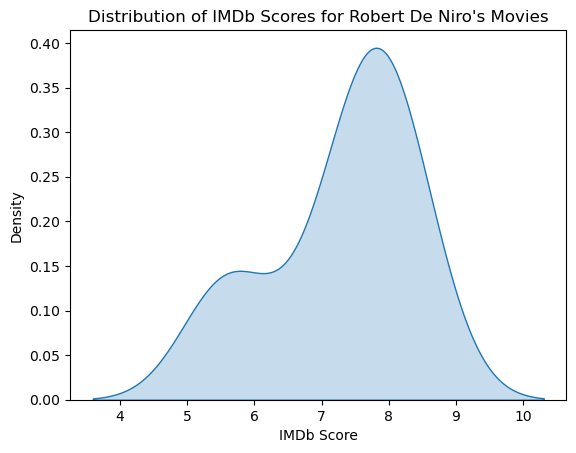

In [43]:
# Filter for movies with Robert De Niro
robert_de_niro_movies = joined_df[joined_df['name'] == 'Robert De Niro']

# Find the movie with the highest imdb score
highest_imdb_movie = robert_de_niro_movies[robert_de_niro_movies['imdb_score'] == robert_de_niro_movies['imdb_score'].max()]

highest_imdb_movie_title = highest_imdb_movie['title'].values[0]
highest_imdb_movie_year = highest_imdb_movie['release_year'].values[0]

print("Movie with the Highest IMDb Score for Robert De Niro:", highest_imdb_movie_title)
print("Year of Release:", highest_imdb_movie_year)

# Create a kde plot of Robert De Niro's imdb movie scores
sns.kdeplot(data=robert_de_niro_movies, x='imdb_score', fill=True)
plt.title("Distribution of IMDb Scores for Robert De Niro's Movies")
plt.xlabel("IMDb Score")
plt.ylabel("Density")
plt.show()

## Question 5
Create two new boolean columns in the titles dataframe that are true when the description contains war or gangster. Call these columns `war_movies` and `gangster_movies`. How many movies are there in both categories? Which category has a higher average IMDB score? Show the IMDB score kernel density estimations of both categories.


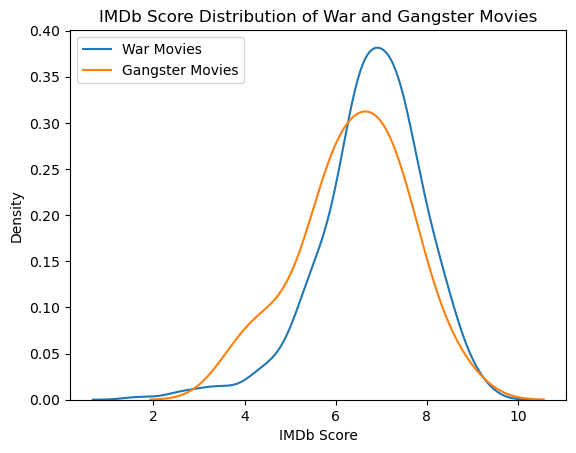

Number of War Movies: 437
Number of Gangster Movies: 35
Average IMDB Score for War Movies: 6.772439024390243
Average IMDB Score for Gangster Movies: 6.3914285714285715


In [50]:
# Create boolean columns based on description 'war' or 'gangster'
titles_df['war_movies'] = titles_df['description'].str.contains('war', case=False)
titles_df['gangster_movies'] = titles_df['description'].str.contains('gangster', case=False)

# Count the number of movies in each category
war_movie_count = titles_df['war_movies'].sum()
gangster_movie_count = titles_df['gangster_movies'].sum()

# Filter out rows with nan values
valid_imdb_scores = titles_df['imdb_score'].notna()

# Calculate average imdb scores for each category
war_movies_avg_imdb = titles_df[titles_df['war_movies'] & valid_imdb_scores]['imdb_score'].mean()
gangster_movies_avg_imdb = titles_df[titles_df['gangster_movies'] & valid_imdb_scores]['imdb_score'].mean()

# Create kde plots for imdb scores of each category
sns.kdeplot(data=titles_df[titles_df['war_movies'] & valid_imdb_scores], x='imdb_score', label='War Movies')
sns.kdeplot(data=titles_df[titles_df['gangster_movies'] & valid_imdb_scores], x='imdb_score', label='Gangster Movies')
plt.title('IMDb Score Distribution of War and Gangster Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Density')
plt.legend()
plt.show()

print("Number of War Movies:", war_movie_count)
print("Number of Gangster Movies:", gangster_movie_count)
print("Average IMDB Score for War Movies:", war_movies_avg_imdb)
print("Average IMDB Score for Gangster Movies:", gangster_movies_avg_imdb)